In [1]:
!pip install split-folders

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import cv2
import os
import PIL
import pathlib
import splitfolders

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
!pip install wandb

In [4]:
!pip install kaggle

In [5]:
# !pip install kaggle_secrets

In [6]:
import wandb
from wandb.keras import WandbCallback
# from kaggle import UserSecretsClient
from kaggle.api.kaggle_api_extended import UserSecretsClient
user_secrets = UserSecretsClient()
wandb_api = user_secrets.get_secret("wandb_api")
wandb.login(key=wandb_api)

OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Shubham Mavaskar\.kaggle. Or use the environment method.

In [7]:
base_ds = 'Leaves1'
base_ds = pathlib.Path(base_ds)

In [10]:
splitfolders.ratio(base_ds, output='imgs', seed=123, ratio=(.7,.15,.15), group_prefix=None)

Copying files: 1970 files [00:02, 755.00 files/s] 


In [11]:
Black_Measles= [fn for fn in os.listdir(f'{base_ds}/0') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
Black_rot= [fn for fn in os.listdir(f'{base_ds}/1') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
Leaf_blight= [fn for fn in os.listdir(f'{base_ds}/2') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
healthy= [fn for fn in os.listdir(f'{base_ds}/3') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h4= [fn for fn in os.listdir(f'{base_ds}/4') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h5= [fn for fn in os.listdir(f'{base_ds}/5') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h6= [fn for fn in os.listdir(f'{base_ds}/6') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h7= [fn for fn in os.listdir(f'{base_ds}/7') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h8= [fn for fn in os.listdir(f'{base_ds}/8') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h9= [fn for fn in os.listdir(f'{base_ds}/9') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h10= [fn for fn in os.listdir(f'{base_ds}/10') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h11= [fn for fn in os.listdir(f'{base_ds}/11') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h12= [fn for fn in os.listdir(f'{base_ds}/12') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h13= [fn for fn in os.listdir(f'{base_ds}/13') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h14= [fn for fn in os.listdir(f'{base_ds}/14') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h15= [fn for fn in os.listdir(f'{base_ds}/15') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h16= [fn for fn in os.listdir(f'{base_ds}/16') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
#Phoma= [fn for fn in os.listdir(f'{base_ds}/Phoma') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
coffee= [Black_Measles,Black_rot,Leaf_blight,healthy ,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16]
coffee_classes = []
for i in os.listdir('imgs/train'):
    coffee_classes+=[i]
coffee_classes.sort()

Total images: 1970
Total number of classes: 33
Total 0 images: 0
Total 1 images: 1
Total 10 images: 2
Total 11 images: 3
Total 12 images: 4
Total 13 images: 5
Total 14 images: 6
Total 15 images: 7
Total 16 images: 8
Total 17 images: 9
Total 18 images: 10
Total 19 images: 11
Total 2 images: 12
Total 20 images: 13
Total 21 images: 14
Total 22 images: 15
Total 23 images: 16
Total 24 images: 17
Total 25 images: 18
Total 26 images: 19
Total 27 images: 20
Total 28 images: 21
Total 29 images: 22
Total 3 images: 23
Total 30 images: 24
Total 31 images: 25
Total 32 images: 26
Total 4 images: 27
Total 5 images: 28
Total 6 images: 29
Total 7 images: 30
Total 8 images: 31
Total 9 images: 32


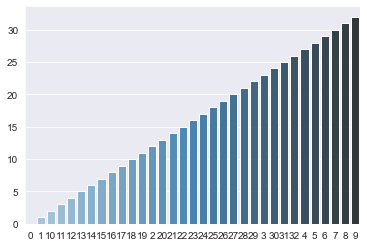

In [12]:
image_count1= len(list(base_ds.glob('*/*.jpg')))
image_count2 = len(list(base_ds.glob('*/*.jpeg')))
image_count=image_count1+image_count2
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(coffee_classes)}')
count = 0
coffee_count = []
for x in coffee_classes:
  print(f'Total {x} images: {len(coffee_count)}')
  coffee_count.append(len(coffee_count))
  count+=1

sns.set_style('darkgrid')
sns.barplot(x=coffee_classes, y=coffee_count, palette="Blues_d")
plt.show()

In [13]:
def load_random_img(dir, label):
  plt.figure(figsize=(10,10))
  i=0
  for label in coffee_classes:
    i+=1
    plt.subplot(1,33, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

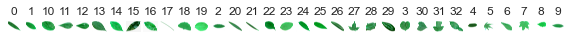

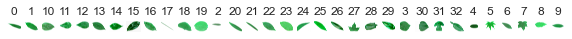

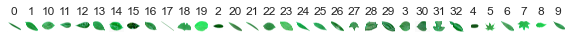

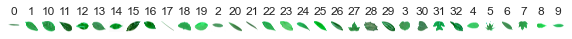

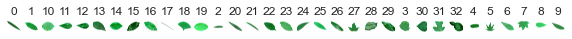

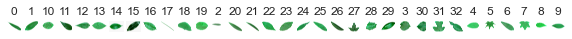

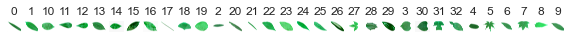

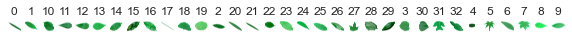

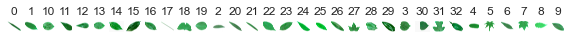

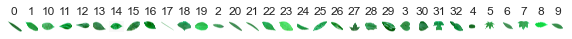

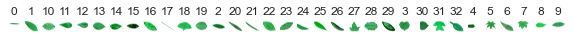

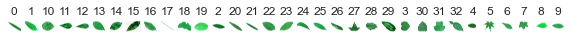

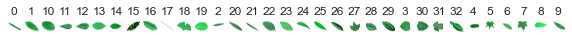

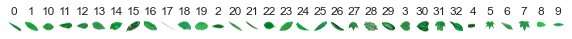

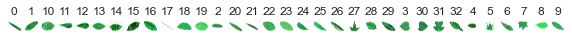

In [14]:
for i in range(15):
  load_random_img(base_ds,coffee_classes)

In [15]:
batch_size =100
img_height, img_width =128,128
input_shape = (img_height, img_width, 3)

CONFIG=dict(
            batch_size =100,
            img_height=128,
            img_width =128,
            )

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,
                               rotation_range=30,
                               zoom_range=0.15,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.15,
                               horizontal_flip=True,
                               fill_mode="nearest")

test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
train_ds = train_datagen.flow_from_directory(
    'imgs/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = "training",
    class_mode='categorical',
    shuffle=True
    )

val_ds = train_datagen.flow_from_directory(
    'imgs/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = test_datagen.flow_from_directory(
    'imgs/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1367 images belonging to 33 classes.
Found 278 images belonging to 33 classes.
Found 325 images belonging to 33 classes.


In [20]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [21]:
CONFIG['model_name'] = 'MobileNet'
print('Training configuration: ', CONFIG)

# Initialize W&B run
run = wandb.init(settings=wandb.Settings(start_method="fork"),
                 reinit=True,
                 project='flavia',
                 entity="visha",
                 config=CONFIG,
                 group='MobileNet',
                 job_type='train')

wandb.config.type = 'baseline'

Training configuration:  {'batch_size': 100, 'img_height': 128, 'img_width': 128, 'model_name': 'MobileNet'}


UsageError: Settings field `start_method`: 'fork' not in ['thread', 'spawn']

In [22]:
model=tf.keras.applications.MobileNet(weights="imagenet", include_top=False, input_shape=input_shape)
model.trainable = True
inputs = tf.keras.Input(input_shape)
x = model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(17, activation='softmax')(x)
model= tf.keras.Model(inputs, x)

In [23]:
model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 17)                17425     
                                                                 
Total params: 4,295,889
Trainable params: 4,274,001
Non-train

In [24]:
history3 =model.fit(train_ds, epochs =30, validation_data = val_ds,callbacks=[WandbCallback()])
run.finish()

Error: You must call wandb.init() before WandbCallback()

In [ ]:
run = wandb.init(settings=wandb.Settings(start_method="fork"),
                 reinit=True,
                 project='flavia',
                 config=CONFIG,
                 group='MobileNet',
                 job_type='evaluate') # Note the job_type

# Update `wandb.config`
wandb.config.type = 'baseline'

# Evaluate model
score3 =model.evaluate(test_ds, verbose=1)

# Finish the run
run.finish()

In [ ]:
print(f'Pretrained Network Fine-tuned "\n"Loss: {score3[0]},"\n" Accuracy: {score3[1]*100}')

In [ ]:
Y_pred =model.predict(test_ds)

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_ds.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.01,
            linecolor="white",
            fmt= '.1f',ax=ax,
           cmap="YlGnBu",)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_ds.class_indices)
ax.yaxis.set_ticklabels(coffee_classes)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
report2 = classification_report(test_ds.classes, y_pred, target_names=coffee_classes, output_dict=True)
df2 = pd.DataFrame(report2).transpose()
df2

In [ ]:
plt.figure(figsize=(10, 10))
x, label= train_ds.next()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i])
    result = np.where(label[i]==1)
    predict =model(tf.expand_dims(x[i], 0))
    score = tf.nn.softmax(predict[0])
    score_label =coffee_classes[np.argmax(score)]
    plt.title(f'Truth: {coffee_classes[result[0][0]]}\nPrediction:{score_label}')
    plt.axis(False)

In [ ]:
model.save('MobileNet-baseline.h5')

# Initialize a new W&B run
run = wandb.init(settings=wandb.Settings(start_method="fork"),
                 reinit=True,
                 project='grapevineresults',
                 config=CONFIG,
                 group='MobileNet',
                 job_type='save') # Note the job_type

# Update `wandb.config`
wandb.config.type = 'baseline'

# Save model as Model Artifact
artifact = wandb.Artifact(name='MobileNet', type='model')
artifact.add_file('MobileNet-baseline.h5')
run.log_artifact(artifact)

# Finish W&B run
run.finish()